# Практические задания

In [2]:
import pandas as pd
from IPython.display import display
churn_df = pd.read_csv('data_13/churn.csv')

churn_df = churn_df.drop(['RowNumber'], axis=1) # удаление дублирующего столбца
display(churn_df.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задание 1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

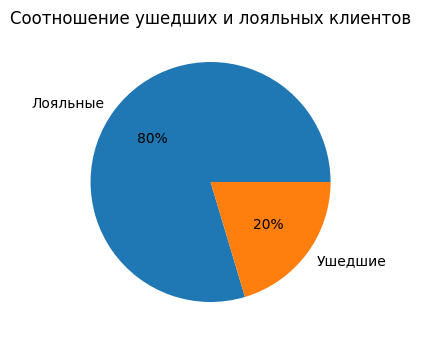

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('default')
              
churn_df['Exited(words)'] = churn_df['Exited'].map({1:'Ушедшие', 0:'Лояльные'})
# обозначение 0 и 1 названиями для отображения на графике
exited = churn_df['Exited(words)'].value_counts(normalize=True)*100
# подсчет доли ушедших клиентов

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=exited.index,
    autopct='%.0f%%',
)
axes.set_title('Соотношение ушедших и лояльных клиентов')

Вывод:
Из предоставленных данных мы видим, что за указанный период лояльными остались 80% клиентов, отказались от услуг банка 20%. Несмотря на то, что 20% кажется не очень большой долей, это означает, что ушел каждый пятый клиент. Такая ситуация, конечно, требует анализа и разработки программы лояльности.

## Задание 2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

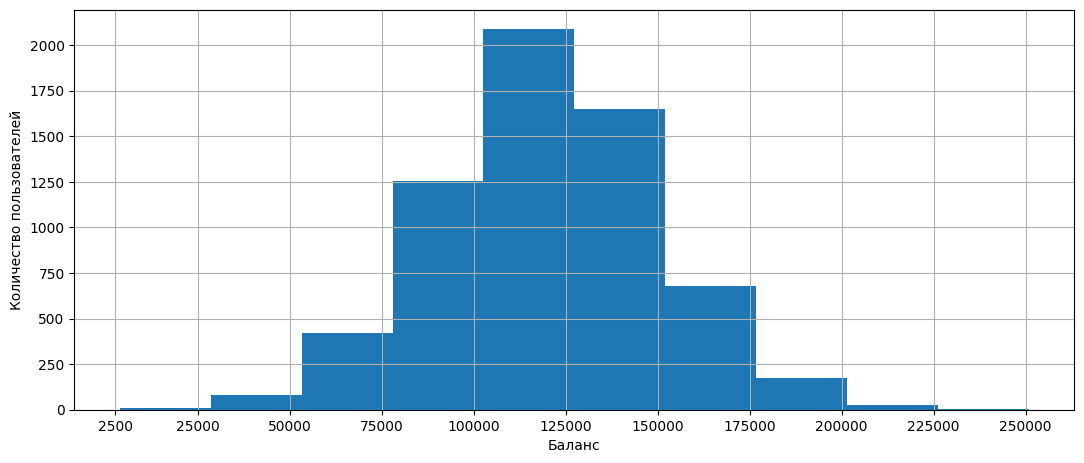

In [20]:
import seaborn as sns

balance = churn_df[churn_df['Balance'] > 2500] 
# фильтрация - берем только клиентов со счетом больше 2500
labels = [2500, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
# метки для оси абсцисс

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=balance['Balance'],
    bins=10,
)
('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes.set_xlabel('Баланс')
axes.set_ylabel('Количество пользователей')
axes.set_xticks(labels)
axes.grid()

Выводы:
Подавляющее число клиентов, имеющих на балансе больше 2 500 долларов, имеют на счетах от 100 000 до 125 000 долларов (более 2 000 пользователей). Около 1600 клиентов имеют на счетах от 125 000 до 150 000 долларов. Около 1250 клиентов имеют на счетах от 75 000 до 100 000 долларов. Именно для этих  категорий клиентов и следует разрабатывать программу лояльности.
Естественно, меньше всего количество пользователей, держащих на счетах максимальную сумму - от 200 000 до 250 000 долларов.
Интересно, что пользователей, имеющих от 2 500 до 25 000 долларов очень мало - меньше 100 человек.
Банку при разработке программы лояльности следует ориентироваться на клиентов, имеющих на счетах от 70 000 до 150 000 долларов, так так это самая много численная группа (без учета клиентов с суммами до 2 500 долларов на счетах).

## Задание 3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

C:\Users\mors0\AppData\Local\Temp\ipykernel_5952\3191438933.py:26: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



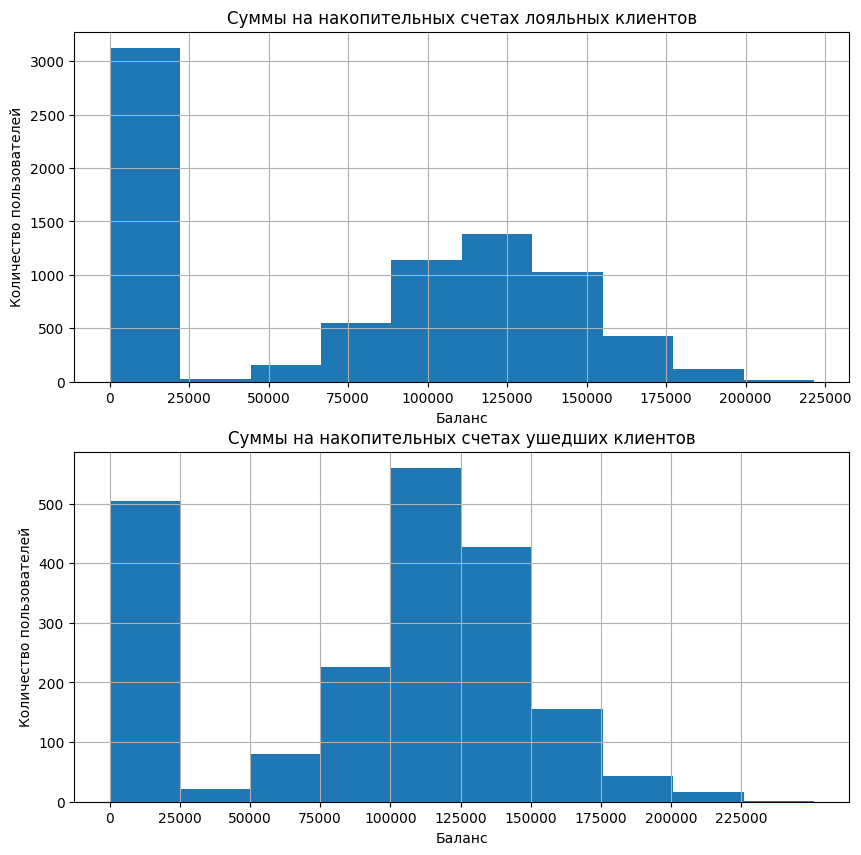

In [63]:
loyal = churn_df[churn_df['Exited']==0] # лояльные клиенты
exited = churn_df[churn_df['Exited']==1] # ушедшие клиенты

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axes[0].hist(
    x=loyal['Balance'],
    bins=10,
)
axes[0].set_title('Суммы на накопительных счетах лояльных клиентов')
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_xticks(range(0, 250000, 25000))
axes[0].grid()

axes[1].hist(
    x=exited['Balance'],
    bins=10,
)
axes[1].set_title('Суммы на накопительных счетах ушедших клиентов')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_xticks(range(0, 250000, 25000))
axes[1].grid()

fig.show()

Выводы:
Мы видим, что самое большое количество лояльных клиентов - те, у кого на счетах менее 25 000 долларов (около 3 100 чел), но и количество ушедших здесь второе по величине - 500 чел. Вероятнее всего, эти цифры являются самыми высокими потому, что это самая многочисленная категория клиентов.
Самый большой отток - среди тех, у кого на счетах от 100 000 до 125 000 долларов (почти 600 чел), но и лояльных клиентов здесь около 1100. Вероятнее всего, именно для этой категории пользователей программа лояльности непродумана. Эта категоря людей (как и следующая, 125 000 - 150 000), скорее всего, больше других ожидает того, чтобы их деньги "работали", то есть приносили хороший процент. Скорее всего, это предприниматели, ищущие для своего капитала самых выгодных условий, они не привязаны к конкретному банку и легко меняют его на тот, где эти условия выгоднее.

## Задание 4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [60]:
import plotly.express as px

fig = px.box(
    data_frame=churn_df,
    x='Age',
    color='Exited',
    title='Распределение возраста в разрезе признака оттока'
)
fig.data[0].name='Ушедшие'
fig.data[1].name='Лояльные'
fig.show()

Вывод:
Больше всего потенциальных выбросов в группе лояльных клиентов в возрасте от 57 до 92 лет.
Основной отток приходится на клиентов в возрасте от 38 до 51 года - на них нужно обратить внимание.

## Задание 5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Кредитный рейтинг')

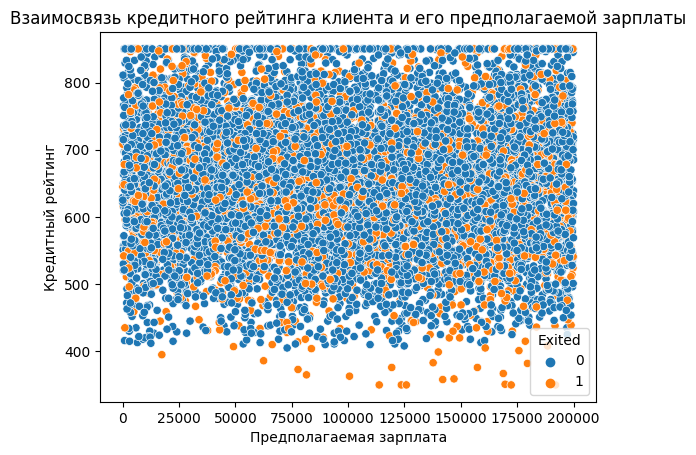

In [10]:
import seaborn as sns

scatter = sns.scatterplot(
    data=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
)
scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
scatter.set_xlabel('Предполагаемая зарплата')
scatter.set_ylabel('Кредитный рейтинг')

Вывод:
Самый высокий кредитный рейтинг, как и самый низкий, распределены равномерно для всех категорий предполагаемых зарплат, поэтому эти две категории не взаимосвязаны. При этом клиентов с кредитным рейтингом до 400 (минимальный) очень мало, хотя предполагаемая зарплата уних не самая маленькая, и все они отказались от услуг банка.

## Задание 6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Зависимость оттока клиентов от пола')

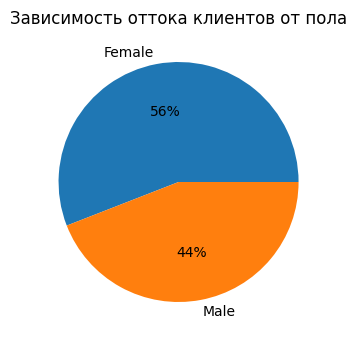

In [19]:
gender = churn_df[churn_df['Exited']==1]['Gender'].value_counts()

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender,
    autopct='%.0f%%',
    labels=gender.index
)
axes.set_title('Зависимость оттока клиентов от пола')

Вывод:
Женщин ушло на 12% больше.

## Задание 7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [60]:
import plotly.express as px

exited_products = churn_df.groupby(['Exited', 'NumOfProducts'], as_index=False)['CustomerId'].count()
# группировка по нужным столцам, подсчет количества клиентов в группах 
fig = px.bar(
    data_frame=exited_products,
    x='NumOfProducts',
    y='CustomerId',
    orientation='v',
    height=500,
    width=700,
    color='Exited',
    title='Зависимость оттока клиентов от количества приобретенных услуг'
)
fig.show()

Вывод:
Саое большое число ушедших клиентов - среди приобретших 1 услугу банка. Значит, когда клиент приобретает 1 услугу и условия перестают казаться ему наилучшими, то он либо приобретает еще одну услугу, либо уходит. При наличии двух услуг больше всего лояльных клиентов, скорее всего, это оптимальный набор услуг, так как при наличии 3х и более услуг лояльных потребителей минимальное количество. Банку следует продумать как стартовый набор услуг, так и дополнительные наборы.

## Задание 8
 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [58]:
active = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
# группировка активных клиентов и ушедших, подсчет

px.bar(
    data_frame=active,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    width=500,
    height=500,
    title='Зависимость оттока от статуса активного клиента'
    
)

Вывод:
В общей сложности активных клиентов больше, но не на много, в обеих группах лояльных потребителей больше. Самая многочисленная группа - активные лояльные клиенты. Ушедших клиентов среди неактивных почти в 2 раза больше, чем среди активных. Это говорит о том, что неактивный клиент довольно редко становится активным, предпочитая услуги другого банка. Рекомендую банку разработать привлекательные условия для клиентов со статусом неактивных с целью их перехода в статус активных.

## Задание 9
 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [47]:
choropleth_data = churn_df.groupby('Geography', as_index=False).mean() # сортировка по странам

fig = px.choropleth(
    data_frame=choropleth_data,
    locations='Geography',
    locationmode='country names',
    color='Exited', # от чего зависит цвет
    hover_name='Geography',
    title='Количество ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Вывод:
Во Франции меньше всего ушедших клиентов, в Испании их тоже немного, а вот в Германии - в 2 раза больше, чем во Франции или в Испании. Вероятнее всего, это связано с менталитетом германцев. Их бережливость общеизвестна, а в период нестабильной ситуации в мире люди предпочитают наличные деньги, отказываясь от услуг банков.

# Задание 10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Зависимость отттока от кредитного рейтинга')

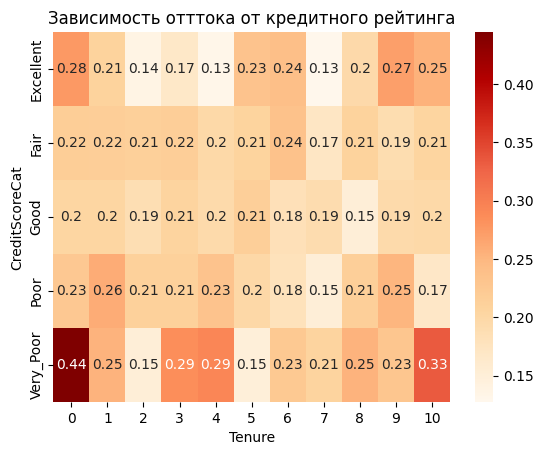

In [54]:
import seaborn as sns

churn_df['CreditScore'] = churn_df['CreditScore'].astype('category')
# перевод в категории

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
# создание нового столбца с применением функции

pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
) #  сводная таблица

heatmap = sns.heatmap(data=pivot, cmap='OrRd', annot=True)
heatmap.set_title('Зависимость отттока от кредитного рейтинга')

Вывод:
Чаще всего уходят клиенты с самым низким кредитным рейтигом на первом году пользования услугами банка. Вообще потребители с низким рейтингом уходят чаще всего: на вором месте по частоте ухода эта группа с 10-летним стажем, на 3м и 4м - пользующиеся услугами банка 3 или 4 года. Потребители с самым высоким кредитным рейтингом - неоднозначная группа: на 1м и 9м году доля ушедших здесь довольно высока, а вот на 2м, 4м и 7м - минимальна. Четкой зависимости оттока от времени пользования услугами банка не наблюдается.